# Ch 9-4. 분포 통계량

## 백분위수와 사분위수
백분위수(percentile) : 데이터를 크기 순서대로 오름차순 정렬했을 때, 뱁ㄱ분율로 나타낸 특정 위치의 값을 의미  

사분위수(quantile) : 데이터를 크기 순서대로 오름차순 정렬했을 때, 4등분한 위치의 값을 의미  
엄밀히 따지면 사분위수가 백분위수 안에 포함되지만, 일반적으로 사분위수를 더 많이 본다. 

## 파이썬을 이용한 백분위수와 사분위수 계산

```
numpy.percentile(values, q)
numpy.quantile(values, q)
# q = 위치 (0~100, 0~1.0)
```

In [1]:
import numpy as np
from scipy.stats import *
import pandas as pd

In [2]:
x = np.arange(1, 12, 1)
print(x)

[ 1  2  3  4  5  6  7  8  9 10 11]


### 백분위수와 사분위수

같은 위치를 정하면 사실상 같다. 

또한 특정 위치에 데이터 값이 없으면 근접한 데이터 포인트의 중간값을 주기 때문에 실제 그 값이 없을 수도 있다는 점 유의하자.

In [3]:
print(np.percentile(x, 10))
print(np.quantile(x, 0.1))

2.0
2.0


In [4]:
print(np.percentile(x, 25))
print(np.quantile(x, 0.25))

3.5
3.5


# 왜도와 첨도

왜도(skewness) : 분포의 비대칭도를 나타내는 통계량.  
왜도가 음수면 오른쪽으로 치우친 것을 의미하며, 양수면 왼쪽으로 치우침을 의미한다.  
0이면 정규분포의 형태를 띠며, 절대값이 1.5 이상이면 치우친 것으로 본다.  

첨도(kurtosis) : 데이터 분포가 얼마나 뾰족한지를 의미함.  
즉 첨도가 높을 수록 이 변수가 좁은 범위에 많은 값들이 몰려 있다고 할 수 있다.  
3이면 정규분포, 그 이상이면 뾰족하고 이하면 덜 뾰족한 것으로 본다.  


## 파이썬을 활용한 왜도, 첨도 계산

```
# skewness
scipy.stats.skew(values)
Series(values).skew()

# kurtosis
scipy.stats.kurtosis(values)
Series(values).kurtosis()
```

In [5]:
# 그래프를 그리기위한 matplotlib import
%matplotlib inline
from matplotlib import pyplot as plt

# 값 지정
x1 = [1] * 30 + [2] * 20 + [3] * 20 + [4] * 15 + [5] * 15 # 좌측으로 치우침
x2 = [1] * 15 + [2] * 20 + [3] * 30 + [4] * 20 + [5] * 15 # 치우치지 않음
x3 = [1] * 15 + [2] * 15 + [3] * 20 + [4] * 20 + [5] * 30 # 우측으로 치우침

In [6]:
# 값 확인
pd.Series(x1).value_counts(sort = False)

1    30
2    20
3    20
4    15
5    15
dtype: int64

### 왜도 시각화

`sort = False` 를 해야하는 이유는, 설정하지 않으면 빈도에 따른 정리가 되기 때문이다. 그 전에 원래 데이터 포인트 값별로 순서대로 나올 수 있도록 설정한다.  

<AxesSubplot:>

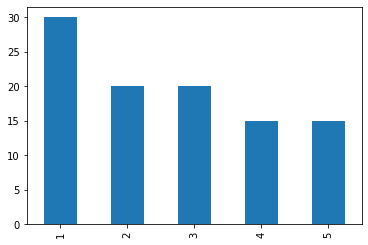

In [7]:
pd.Series(x1).value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

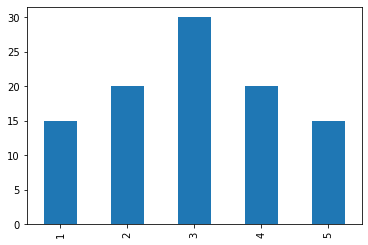

In [8]:
pd.Series(x2).value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

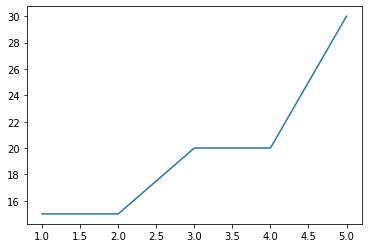

In [10]:
pd.Series(x3).value_counts(sort = False).plot(kind = 'line')

### 왜도 계산

셋다 1.5를 넘지 않기 때문에 많이 치우친 것으로 보지는 않는다. 

In [11]:
print("좌로 치우쳤을 때 왜도:", skew(x1))
print("치우치지 않았을 때 왜도:", skew(x2))
print("우로 치우친 왜도:", skew(x3))

좌로 치우쳤을 때 왜도: 0.3192801008486361
치우치지 않았을 때 왜도: 0.0
우로 치우친 왜도: -0.31928010084863606


### 첨도 시각화

여기서의 `x1`처럼 평평한 분포를 uniform 분포라고 부른다.  

In [12]:
x1 = [1] * 20 + [2] * 20 + [3] * 20 + [4] * 20 + [5] * 20 # 전혀 뾰족하지 않음
x2 = [1] * 10 + [2] * 20 + [3] * 40 + [4] * 20 + [5] * 10 # 조금 뾰족
x3 = [1] * 5 + [2] * 15 + [3] * 60 + [4] * 15 + [5] * 5   # 매우 뾰족

<AxesSubplot:>

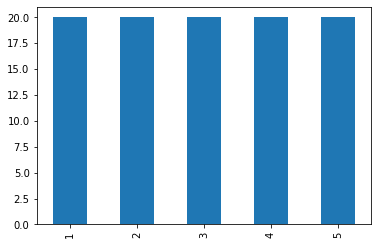

In [13]:
pd.Series(x1).value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

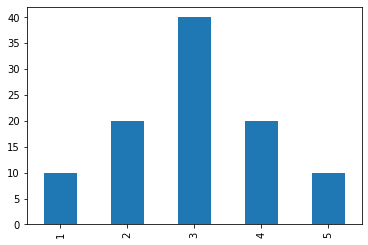

In [14]:
pd.Series(x2).value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

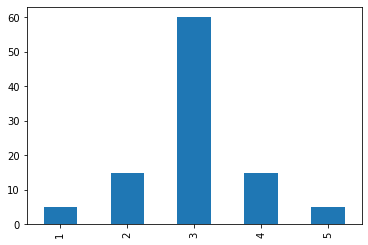

In [15]:
pd.Series(x3).value_counts(sort = False).plot(kind = 'bar')

### 첨도 계산

뾰족해질 수록 첨도가 높아진다. 

데이터가 범주형이었기 때문에 정규분포인 3에 미치지 못하는 것으로 보이지만. 3이 대부분 기준이 된다.

In [16]:
print("전혀 뾰족하지 않을 때 (평평할 때) 첨도:", kurtosis(x1))
print("조금 뾰족할 때 첨도:", kurtosis(x2))
print("매우 뾰족할 때 첨도:", kurtosis(x3))

전혀 뾰족하지 않을 때 (평평할 때) 첨도: -1.3
조금 뾰족할 때 첨도: -0.5
매우 뾰족할 때 첨도: 0.8775510204081636
